In [5]:
import os
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow_io as tfio

In [3]:
import soundfile as sf

In [11]:


def convert_to_wav(input_file, output_file):
    # Read audio data from input file
    audio_data, sample_rate = sf.read(input_file)
    # Write audio data to output file in WAV format
    sf.write(output_file, audio_data, sample_rate, format='WAV')

In [28]:
tamil_input = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu"
tamil_output = "/kaggle/working/telugu"

In [33]:
len(os.listdir(tamil_output))

2000

In [32]:
len(os.listdir(tamil_input))

23656

In [34]:
os.listdir(tamil_output)[0]

'output1927.wav'

In [31]:
for i , file in enumerate(os.listdir(tamil_input)[:2000]):
    file_path = os.path.join(tamil_input , file)
    output_path = os.path.join(tamil_output,f"output{i}.wav")
    convert_to_wav(file_path,output_path)
    print("susscessfully converted:",i)

susscessfully converted: 0
susscessfully converted: 1
susscessfully converted: 2
susscessfully converted: 3
susscessfully converted: 4
susscessfully converted: 5
susscessfully converted: 6
susscessfully converted: 7
susscessfully converted: 8
susscessfully converted: 9
susscessfully converted: 10
susscessfully converted: 11
susscessfully converted: 12
susscessfully converted: 13
susscessfully converted: 14
susscessfully converted: 15
susscessfully converted: 16
susscessfully converted: 17
susscessfully converted: 18
susscessfully converted: 19
susscessfully converted: 20
susscessfully converted: 21
susscessfully converted: 22
susscessfully converted: 23
susscessfully converted: 24
susscessfully converted: 25
susscessfully converted: 26
susscessfully converted: 27
susscessfully converted: 28
susscessfully converted: 29
susscessfully converted: 30
susscessfully converted: 31
susscessfully converted: 32
susscessfully converted: 33
susscessfully converted: 34
susscessfully converted: 35
su

In [158]:
print(tamil_data.element_spec)
print(malayalam_data.element_spec)
print(hindi_data.element_spec)
print(hindi_data.element_spec)
# Adjust element structure if neces

(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))


In [16]:
# import shutil

# # Specify the path of the folder you want to delete
# folder_path = '/kaggle/working/Tamil'

# # Check if the folder exists
# if os.path.exists(folder_path):
#     # Delete the folder
#     os.mkdir(folder_path)
#     print("Folder deleted successfully.")
# else:
#     print("Folder does not exist.")


Folder does not exist.


In [10]:
!mkdir malayalam


In [6]:

def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


In [7]:

def preprocess(file_path, label): 
    wav =load_wav_16k_mono(file_path)
  
    wav = wav[:64000]
    zero_padding = tf.zeros([64000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
 
    spectrogram = tf.signal.stft(wav, frame_length=512, frame_step=256)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [37]:
import wave

def get_wav_channels(filename):
    with wave.open(filename, 'rb') as wf:
        num_channels = wf.getnchannels()
    return num_channels

# Example usage:
filename = '/kaggle/working/Tamil/output20.wav'  # Replace 'example.wav' with the path to your WAV file
num_channels = get_wav_channels(filename)
print(f"Number of channels in '{filename}': {num_channels}")


Number of channels in '/kaggle/working/Tamil/output20.wav': 2


In [4]:
tamil = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/Tamil"
telugu = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/telugu"
hindi = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/hindi"
malayalam = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/malayalam"

In [40]:
import os
import librosa

# Directory containing your audio files
audio_dir = hindi

# List to store sample rates of all audio files
sample_rates = []

# Iterate over all audio files in the directory
for file_name in os.listdir(audio_dir):
    file_path = os.path.join(audio_dir, file_name)
    
    # Load audio file and its sample rate
    audio, sr = librosa.load(file_path, sr=None)
    
    # Append sample rate to the list
    sample_rates.append(sr)

# Calculate average sample rate
average_sample_rate = sum(sample_rates) / len(sample_rates)

print("Average Sample Rate:", average_sample_rate)


AttributeError: module 'numpy' has no attribute 'complex'.
`np.complex` was a deprecated alias for the builtin `complex`. To avoid this error in existing code, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

tamil -Average Sample Rate: 44859.2   , telugu - Average Sample Rate: 46278.8 , malayalam - Average Sample Rate: 43158.4
, hindi = Average Sample Rate: 45868.0


In [5]:
tamil_lang = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/Tamil/output0.wav"
telugu_lang = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/telugu/output0.wav"

In [6]:
tamil_wave= load_wav_16k_mono(tamil_lang)
telugu_wave = load_wav_16k_mono(telugu_lang)


2024-02-05 20:45:22.463841: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-05 20:45:22.712122: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA


In [7]:
malayala_wave = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/malayalam/output0.wav"
hindi_wave = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/hindi/output0.wav"

In [8]:
malayala_wave = load_wav_16k_mono(malayala_wave)
hindi_wave  =load_wav_16k_mono(hindi_wave)

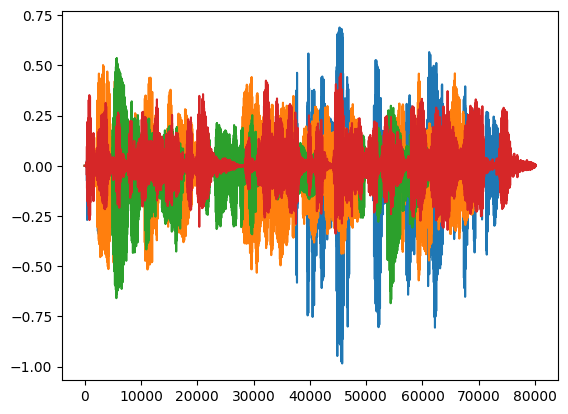

In [9]:
plt.plot(tamil_wave)
plt.plot(telugu_wave)
plt.plot(malayala_wave)
plt.plot(hindi_wave)
plt.show()

In [10]:
tamil_data =tf.data.Dataset.list_files(tamil + '/*.wav')
hindi_data = tf.data.Dataset.list_files(hindi+'/*.wav')
malayalam_data = tf.data.Dataset.list_files(malayalam +'/*.wav')
telugu_data = tf.data.Dataset.list_files(telugu+'/*.wav')


In [11]:
print(len(tamil_data),len(telugu_data),len(malayalam_data),len(hindi_data))

1000 1000 1000 1000


In [12]:
#create the label
tamil_label = tf.fill(len(tamil_data),1)
telugu_label = tf.fill(len(telugu_data),0)
malayalam_label = tf.fill(len(malayalam_data),2)
hindi_label = tf.fill(len(hindi_data),3)

In [13]:
tamil_data = tf.data.Dataset.zip(tamil_data , tf.data.Dataset.from_tensor_slices(tamil_label))

In [17]:
malayalam_data.as_numpy_iterator().next()

(b'/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/malayalam/output96.wav',
 2)

In [18]:
tamil_data.as_numpy_iterator().next()

(b'/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/Tamil/output409.wav',
 1)

In [14]:
telugu_data = tf.data.Dataset.zip(telugu_data , tf.data.Dataset.from_tensor_slices(telugu_label))
malayalam_data = tf.data.Dataset.zip(malayalam_data , tf.data.Dataset.from_tensor_slices(malayalam_label))
hindi_data = tf.data.Dataset.zip(hindi_data , tf.data.Dataset.from_tensor_slices(hindi_label))

In [19]:
print(tamil_data.element_spec)
print(malayalam_data.element_spec)
print(hindi_data.element_spec)
print(hindi_data.element_spec)
# Adjust element structure if neces

(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))
(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))


In [20]:
hindi_data.as_numpy_iterator().next()

(b'/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/hindi/output310.wav',
 3)

In [21]:
telugu_data.as_numpy_iterator().next()

(b'/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/telugu/output793.wav',
 0)

In [22]:
print(len(tamil_data),len(malayalam_data),len(telugu_data),len(hindi_data))

1000 1000 1000 1000


In [23]:
data = malayalam_data.concatenate(tamil_data).concatenate(hindi_data).concatenate(telugu_data)

In [27]:
data.shuffle(100000).as_numpy_iterator().next()

(b'/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/malayalam/output202.wav',
 2)

4.1 Calculate Wave Cycle Length

In [224]:
for file in os.listdir(tamil):
    print(os.path.join(tamil,file))

/kaggle/working/Tamil/output945.wav
/kaggle/working/Tamil/output268.wav
/kaggle/working/Tamil/output20.wav
/kaggle/working/Tamil/output517.wav
/kaggle/working/Tamil/output775.wav
/kaggle/working/Tamil/output61.wav
/kaggle/working/Tamil/output341.wav
/kaggle/working/Tamil/output503.wav
/kaggle/working/Tamil/output471.wav
/kaggle/working/Tamil/output702.wav
/kaggle/working/Tamil/output139.wav
/kaggle/working/Tamil/output542.wav
/kaggle/working/Tamil/output279.wav
/kaggle/working/Tamil/output703.wav
/kaggle/working/Tamil/output596.wav
/kaggle/working/Tamil/output1344.wav
/kaggle/working/Tamil/output671.wav
/kaggle/working/Tamil/output1300.wav
/kaggle/working/Tamil/output25.wav
/kaggle/working/Tamil/output1014.wav
/kaggle/working/Tamil/output1430.wav
/kaggle/working/Tamil/output324.wav
/kaggle/working/Tamil/output1417.wav
/kaggle/working/Tamil/output159.wav
/kaggle/working/Tamil/output1447.wav
/kaggle/working/Tamil/output808.wav
/kaggle/working/Tamil/output107.wav
/kaggle/working/Tamil/out

In [336]:
lengths = []
for file in os.listdir(telugu):
    tensor_wave = load_wav_16k_mono(os.path.join(telugu,file))
    lengths.append(len(tensor_wave))


In [337]:
lengths

[80056,
 80079,
 80056,
 79638,
 80079,
 79695,
 79695,
 79638,
 79695,
 79695,
 80079,
 79695,
 79695,
 79638,
 79695,
 80056,
 79695,
 80079,
 80056,
 79638,
 80056,
 80056,
 79638,
 80079,
 79638,
 79695,
 80079,
 79695,
 79695,
 79695,
 80056,
 80079,
 80079,
 79638,
 80079,
 80079,
 79695,
 79638,
 79638,
 80079,
 79638,
 79695,
 80056,
 80056,
 79695,
 79638,
 79695,
 79638,
 80079,
 80079,
 79638,
 80079,
 79695,
 79695,
 79638,
 79695,
 80056,
 79638,
 79638,
 80079,
 79638,
 80079,
 79695,
 80079,
 80079,
 80056,
 80079,
 79638,
 79695,
 79638,
 79638,
 80079,
 79638,
 79695,
 79638,
 79695,
 79638,
 80079,
 79695,
 79638,
 80079,
 80079,
 79638,
 79695,
 80056,
 79638,
 79695,
 79638,
 79695,
 79695,
 80056,
 79695,
 80079,
 80079,
 80056,
 80079,
 80079,
 79695,
 79638,
 79695,
 80079,
 79695,
 79695,
 79695,
 79638,
 80056,
 79695,
 80056,
 80079,
 79638,
 79638,
 80056,
 79695,
 80079,
 80056,
 79695,
 79695,
 79695,
 79638,
 80056,
 80056,
 80056,
 79695,
 79695,
 80056,


In [338]:
mean = tf.math.reduce_mean(lengths)

mind = tf.math.reduce_min(lengths)

maxd = tf.math.reduce_max(lengths)

print(mean , mind , maxd)

tf.Tensor(79695, shape=(), dtype=int32) tf.Tensor(3698, shape=(), dtype=int32) tf.Tensor(80079, shape=(), dtype=int32)


tamil - tf.Tensor(79511, shape=(), dtype=int32) tf.Tensor(6066, shape=(), dtype=int32) tf.Tensor(80079, shape=(), dtype=int32)

In [331]:
79511/16000

4.9694375

In [28]:
file_path , label = malayalam_data.as_numpy_iterator().next()

In [29]:
spectogram , label = preprocess(file_path , label)

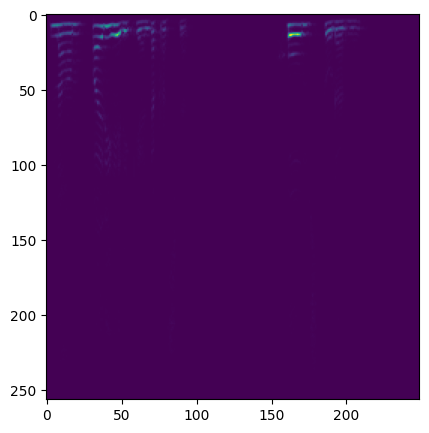

In [30]:
plt.figure(figsize = (10,5))
plt.imshow(tf.transpose(spectogram)[0])
plt.show()

In [130]:
# tamil_data = tamil_data.map(lambda x, y: (x, tf.cast(y, tf.int32)))

In [148]:
# # Inspect element structure
# print(tamil_dataset.element_spec)
# print(malayalam_dataset.element_spec)
# print(telugu_dataset.element_spec)
# print(hindi_data.element_spec)
# Adjust element structure if necessary
# For example, if malayalam_dataset's second tensor has dtype int32 instead of float32,
# # # you can convert it using tf.cast:
# malayalam_data = malayalam_data.map(lambda x, y: (x, tf.cast(y, tf.float32)))
# hindi_data = hindi_data.map(lambda x, y: (x, tf.cast(y, tf.float32)))

# # Now check if all datasets have the same element structure
# print(tamil_data.element_spec == malayalam_data.element_spec  == hindi_data.element_spec)

# # Concatenate datasets
# combined_dataset = tamil_data.concatenate(malayalam_data).concatenate(hindi_data)


In [31]:
#data pipeline
data = data.map(preprocess)


In [32]:
data = data.cache()
data = data.shuffle(100000)
data = data.batch(32)
data = data.prefetch(8)

In [34]:
len(data)

125

In [33]:
train = data.take(90)
val = data.skip(90).take(20)
test = data.skip(90 + 20).take(15)


In [115]:
print(len(train), len(test),len(val))

90 15 20


In [ ]:
samples.shape

In [369]:
labels

array([3, 3, 0, 0, 0, 0, 2, 0, 3, 0, 2, 2, 0, 2, 0, 3, 2, 3, 2, 1, 0, 3,
       0, 2, 3, 2, 0, 1, 0, 3, 3, 3], dtype=int32)

In [35]:
#create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten ,MaxPooling2D,Dropout


In [103]:
model = Sequential()

In [104]:


# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (249, 257, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to transition from convolutional layers to dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization

# Output layer (softmax activation for multi-class classification)
model.add(Dense(4, activation='softmax'))


In [36]:
new_model = Sequential()

In [37]:
pretrained_model = tf.keras.models.load_model("/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/langprediction_version_1_3.h5")

In [38]:
new_model.add(pretrained_model)

new_model.add(Flatten())

# Dense layers
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.5))  # Dropout layer for regularization

# Output layer (softmax activation for multi-class classification)
new_model.add(Dense(4, activation='softmax'))

In [39]:
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [40]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 4)                 30493700  
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 128)               640       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 30494856 (116.33 MB)
Trainable params: 30494856 (116.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history = new_model.fit(train , validation_data = val , epochs = 5)

Epoch 1/5


2024-02-05 20:47:30.284098: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:33: Filling up shuffle buffer (this may take a while): 763 of 100000
2024-02-05 20:47:50.251143: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:33: Filling up shuffle buffer (this may take a while): 2118 of 100000
2024-02-05 20:48:00.261713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:33: Filling up shuffle buffer (this may take a while): 2809 of 100000
2024-02-05 20:48:10.297294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:33: Filling up shuffle buffer (this may take a while): 3557 of 100000
2024-02-05 20:48:15.918637: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


90/90 [==============================] - 243s 2s/step - loss: 1.2820 - accuracy: 0.4229 - val_loss: 1.1331 - val_accuracy: 0.4844
Epoch 2/5
90/90 [==============================] - 188s 2s/step - loss: 0.9697 - accuracy: 0.6802 - val_loss: 0.5349 - val_accuracy: 0.9219
Epoch 3/5
90/90 [==============================] - 191s 2s/step - loss: 0.5345 - accuracy: 0.8726 - val_loss: 0.2494 - val_accuracy: 0.9578
Epoch 4/5
90/90 [==============================] - 187s 2s/step - loss: 0.4295 - accuracy: 0.8826 - val_loss: 0.3967 - val_accuracy: 0.8875
Epoch 5/5
90/90 [==============================] - 184s 2s/step - loss: 0.4306 - accuracy: 0.8753 - val_loss: 0.2293 - val_accuracy: 0.9500


In [46]:
new_model.save("model_langv_1_5.h5")


ValueError: Unable to synchronously create dataset (name already exists)

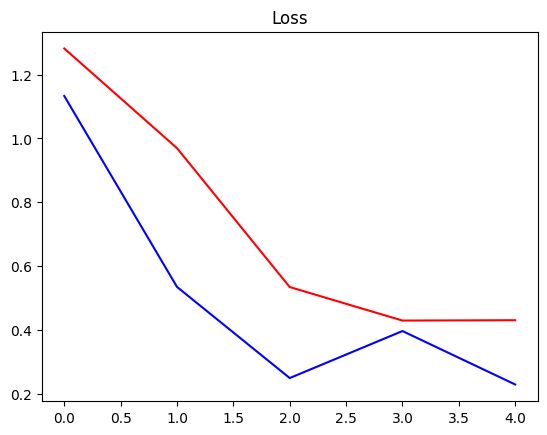

In [47]:
plt.title('Loss')
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.show()





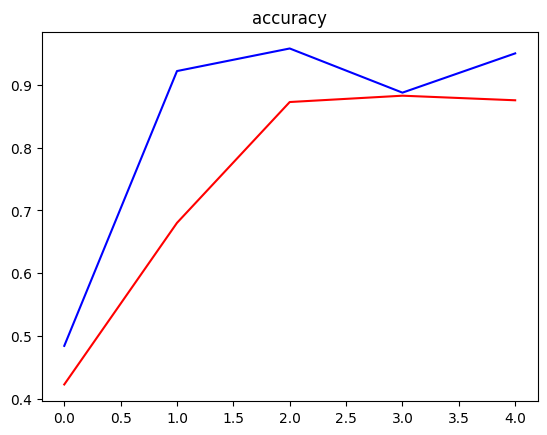

In [48]:
plt.title('accuracy')
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.show()

In [97]:
samples , labels = test.as_numpy_iterator().next()

In [98]:
ypred = model.predict(samples)

1/1 [==============================] - 0s 21ms/step


In [1]:
from tensorflow.keras.models import load_model

2024-02-05 21:09:37.015475: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 21:09:37.015634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 21:09:37.042162: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 21:09:37.109637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-05 21:09:39.814155: W tensorflow/compiler/tf2

In [2]:
new_up_model= load_model("/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/model_langv_1_5.h5")

2024-02-05 21:09:42.893153: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [91]:

len(ypred)



32

In [408]:
ypred[0]

array([1.7176117e-24, 7.4915718e-30, 0.0000000e+00, 1.0000000e+00],
      dtype=float32)

In [93]:
import numpy as np 


In [99]:
ypred_labels = np.argmax(ypred, axis=1)


In [100]:
mapping = {0: 'Telugu', 1: 'Tamil', 2: 'Malayalam', 3: 'Hindi'}

# Map the predicted labels to their corresponding language names
predicted_languages = [mapping[label] for label in ypred_labels]

print(predicted_languages)

['Hindi', 'Hindi', 'Telugu', 'Telugu', 'Telugu', 'Malayalam', 'Tamil', 'Telugu', 'Malayalam', 'Malayalam', 'Hindi', 'Malayalam', 'Telugu', 'Telugu', 'Hindi', 'Tamil', 'Hindi', 'Hindi', 'Telugu', 'Telugu', 'Malayalam', 'Telugu', 'Telugu', 'Telugu', 'Telugu', 'Malayalam', 'Tamil', 'Hindi', 'Hindi', 'Telugu', 'Telugu', 'Telugu']


In [3]:
import os


In [96]:
os.listdir("/kaggle/working/")

['langprediction_version_1_4.h5',
 'telugu',
 'hindi',
 '.virtual_documents',
 'Tamil',
 'langprediction_version_1_3.h5',
 'malayalam']

In [102]:

import os
from IPython.display import HTML  # Import the HTML class from IPython.display

# Define the path to your model file
model_file_path = '/kaggle/working/langprediction_version_1_3.h5'  # Adjust this path according to where your model is saved

# Check if the model file exists
if os.path.exists(model_file_path):
    # Generate a downloadable link
    download_link = f'<a href="{model_file_path}" download>Click here to download your model</a>'
    display(HTML(download_link))  # This will display the download link
else:
    print("Model file not found.")


In [ ]:
[Download Model](langprediction_version_1_3.h5) | <a href="about:blank" target="_blank">Click here to open a blank page</a>


In [ ]:
import os
from IPython.display import HTML  # Import the HTML class from IPython.display

# Define the path to your model file
model_file_path = '/kaggle/working/langprediction_version_1_3.h5'  # Adjust this path according to where your model is saved

# Check if the model file exists
if os.path.exists(model_file_path):
    # Generate a downloadable link
    download_link = f'<a href="{model_file_path}" download>Click here to download your model</a>'
    display(HTML(download_link))  # This will display the download link
else:
    print("Model file not found.")
[Download Model](langprediction_version_1_3.h5) | <a href="about:blank" target="_blank">Click here to open a blank page,</a>


In [2]:
import tensorflow as tf

2024-02-05 07:35:52.393598: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 07:35:52.393776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 07:35:52.415833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-05 07:35:52.471601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-05 07:35:53.939734: W tensorflow/compiler/tf2

In [3]:
model = tf.keras.models.load_model("/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/langprediction_version_1_3.h5")

2024-02-05 07:35:56.234055: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-05 07:35:56.331085: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.
2024-02-05 07:35:56.389442: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.
2024-02-05 07:35:56.433350: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.
2024-02-05 07:35:57.069315: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.
2024-02-05 07:35:57.184695: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.


In [110]:
ypred = model.predict(samples)

1/1 [==============================] - 0s 71ms/step


In [ ]:
model.predict(samples)

In [113]:
ypred

array([[1.1487691e-15, 1.2991720e-21, 4.5826808e-25, 1.0000000e+00],
       [2.5594060e-08, 6.7072324e-12, 1.6745588e-13, 1.0000000e+00],
       [1.0000000e+00, 1.3322762e-21, 1.7992053e-15, 1.8121748e-16],
       [1.0000000e+00, 5.0338615e-24, 5.4425292e-16, 2.7021365e-20],
       [5.9964305e-01, 6.0023550e-02, 2.0289144e-01, 1.3744192e-01],
       [9.0259533e-14, 7.7648998e-08, 9.9999988e-01, 6.5925809e-10],
       [2.8617759e-12, 9.9999964e-01, 3.1026227e-07, 0.0000000e+00],
       [1.0000000e+00, 2.3764824e-19, 7.1720292e-14, 1.8330606e-16],
       [1.3981030e-17, 7.8310947e-10, 1.0000000e+00, 1.2321220e-12],
       [5.7511893e-19, 3.9674020e-10, 1.0000000e+00, 7.7271285e-14],
       [1.1355470e-07, 2.6119284e-11, 2.3681604e-12, 9.9999988e-01],
       [1.7286230e-15, 1.2008354e-08, 1.0000000e+00, 4.1986341e-11],
       [9.8974681e-01, 2.1637972e-03, 6.9713932e-03, 1.1180689e-03],
       [5.8307987e-01, 6.7777082e-02, 2.1422414e-01, 1.3491894e-01],
       [6.8612491e-07, 2.4659352e-

In [111]:
ypred_labels = np.argmax(ypred, axis=1)

In [112]:
mapping = {0: 'Telugu', 1: 'Tamil', 2: 'Malayalam', 3: 'Hindi'}

# Map the predicted labels to their corresponding language names
predicted_languages = [mapping[label] for label in ypred_labels]

print(predicted_languages)

['Hindi', 'Hindi', 'Telugu', 'Telugu', 'Telugu', 'Malayalam', 'Tamil', 'Telugu', 'Malayalam', 'Malayalam', 'Hindi', 'Malayalam', 'Telugu', 'Telugu', 'Hindi', 'Tamil', 'Hindi', 'Telugu', 'Telugu', 'Telugu', 'Malayalam', 'Telugu', 'Telugu', 'Malayalam', 'Telugu', 'Malayalam', 'Tamil', 'Hindi', 'Hindi', 'Telugu', 'Telugu', 'Telugu']


In [115]:
if np.any(ypred > 0.50):

    ypred_labels = np.argmax(ypred, axis=1)

 
    mapping = {0: 'Telugu', 1: 'Tamil', 2: 'Malayalam', 3: 'Hindi'}
    predicted_languages = [mapping[label] for label in ypred_labels]

    print(predicted_languages)
else:
    print("Language not found")


['Hindi', 'Hindi', 'Telugu', 'Telugu', 'Telugu', 'Malayalam', 'Tamil', 'Telugu', 'Malayalam', 'Malayalam', 'Hindi', 'Malayalam', 'Telugu', 'Telugu', 'Hindi', 'Tamil', 'Hindi', 'Telugu', 'Telugu', 'Telugu', 'Malayalam', 'Telugu', 'Telugu', 'Malayalam', 'Telugu', 'Malayalam', 'Tamil', 'Hindi', 'Hindi', 'Telugu', 'Telugu', 'Telugu']


In [128]:
#make unknown prediction

step 1:

In [144]:
prediction = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Urdu/0.mp3"

step 2

In [145]:
output_file = "/kaggle/working/output.wav"
def convert_to_wav(input_file, output_file):
    # Read audio data from input file
    audio_data, sample_rate = sf.read(input_file)
    # Write audio data to output file in WAV format
    sf.write(output_file, audio_data, sample_rate, format='WAV')

In [147]:
os.listdir("/kaggle/working/")

['langprediction_version_1_4.h5',
 'telugu',
 'ouput_pred.wav)',
 'hindi',
 '.virtual_documents',
 'Tamil',
 'langprediction_version_1_3.h5',
 'malayalam']

In [143]:
convert_to_wav(prediction,output_file )

In [3]:
predic = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/Tamil/output0.wav"

In [9]:
predic = preprocess_test(predic)

2024-02-05 21:11:03.848950: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA


In [10]:
predic

<tf.Tensor: shape=(249, 257, 1), dtype=float32, numpy=
array([[[2.63813317e-01],
        [2.52861291e-01],
        [2.20362484e-01],
        ...,
        [1.75573532e-05],
        [9.14363227e-06],
        [5.52833080e-06]],

       [[9.45533693e-01],
        [8.94248664e-01],
        [1.61305320e+00],
        ...,
        [3.65119813e-05],
        [2.82068268e-05],
        [1.60336494e-05]],

       [[1.63849026e-01],
        [1.80915490e-01],
        [5.81439853e-01],
        ...,
        [6.99861403e-06],
        [5.52881784e-06],
        [2.79396772e-06]],

       ...,

       [[3.47477436e-01],
        [2.10274965e-01],
        [2.81779885e-01],
        ...,
        [6.43231469e-05],
        [1.46130960e-05],
        [2.60770321e-06]],

       [[2.78314084e-01],
        [3.28166783e-01],
        [1.38588756e-01],
        ...,
        [1.34932161e-05],
        [2.54140814e-05],
        [4.15742397e-05]],

       [[1.24083154e-01],
        [2.71944672e-01],
        [1.33514106e-01],

In [13]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [8]:

def preprocess_test(file_path): 
    wav =load_wav_16k_mono(file_path)
   
    wav = wav[:64000]
    zero_padding = tf.zeros([64000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
 
    spectrogram = tf.signal.stft(wav, frame_length=512, frame_step=256)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [12]:
import numpy as np

In [19]:
prediction

<tf.Tensor: shape=(249, 257, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[2.9926861e-04],
        [2.8748042e-04],
        [2.5390016e-04],
        ...,
        [1.5712397e-08],
        [6.9417401e-09],
        [2.0081643e-09]],

       [[2.6486713e-02],
        [4.8443500e-02],
        [1.7314209e-01],
        ...,
        [9.0459378e-07],
        [5.9384502e-07],
        [5.5134296e-07]],

       ...,

       [[7.1838993e-01],
        [7.3176646e-01],
        [5.4944718e-01],
        ...,
        [3.2223419e-05],
        [1.9839879e-05],
        [7.1525574e-07]],

       [[1.1137536e+00],
        [2.8559166e-01],
        [2.6364639e-01],
        ...,
        [4.3542000e-06],
        [3.3240492e-06],
        [6.1392784e-06]],

       [[9.3021840e-02],
        [2.6338816e-01],
        [1.2089003e+00],
        ...,
        [4.5802590e

In [24]:
prediction = preprocess_test(prediction)


In [13]:


# Reshape the input data to match the expected input shape
prediction = np.reshape(predic , (-1, 249, 257, 1))

In [15]:
ypred = new_up_model.predict(prediction)

1/1 [==============================] - 0s 335ms/step


In [17]:
ypred



array([[0.03640448, 0.9332228 , 0.02530264, 0.00507008]], dtype=float32)

In [16]:
np.argmax(ypred)

1

In [ ]:
if np.any(ypred > 0.50):

    ypred_labels = np.argmax(ypred, axis=1)

 
    mapping = {0: 'Telugu', 1: 'Tamil', 2: 'Malayalam', 3: 'Hindi'}
    predicted_languages = [mapping[label] for label in ypred_labels]

    print(predicted_languages)
else:
    print("Language not found")

In [10]:
model = tf.keras.models.load_model("/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/langprediction_version_1_3.h5")

2024-02-05 20:19:18.133805: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-05 20:19:18.311079: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.
2024-02-05 20:19:18.394402: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.
2024-02-05 20:19:18.480478: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.
2024-02-05 20:19:19.054861: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.
2024-02-05 20:19:19.145934: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121896960 exceeds 10% of free system memory.


In [18]:
pred = "/home/saaho/Mechine_learnig/DeepLearning/MODELS/Language_prediction/output/malayalam/output998.wav"

In [19]:
pred =preprocess_test(pred)

In [32]:
pred

<tf.Tensor: shape=(249, 257, 1), dtype=float32, numpy=
array([[[6.3508354e-02],
        [1.1128500e-01],
        [1.8785441e-01],
        ...,
        [7.8089050e-07],
        [2.7577215e-07],
        [3.5017729e-07]],

       [[2.6362114e-02],
        [1.0811761e-02],
        [1.5341000e-01],
        ...,
        [1.9037983e-06],
        [1.0066065e-06],
        [1.3224781e-06]],

       [[6.5443292e-04],
        [8.8978820e-02],
        [1.5226449e-01],
        ...,
        [2.2387508e-06],
        [1.5585121e-06],
        [1.1622906e-06]],

       ...,

       [[5.9963204e-06],
        [2.0279907e-02],
        [5.8540989e-02],
        ...,
        [2.9409930e-06],
        [1.0493576e-06],
        [1.9092113e-08]],

       [[3.4217201e-02],
        [6.3182548e-02],
        [1.8246768e-01],
        ...,
        [3.2371572e-06],
        [6.7724505e-07],
        [1.9744039e-07]],

       [[1.2296246e-02],
        [9.3036212e-02],
        [2.6913649e-01],
        ...,
        [1.1404987e

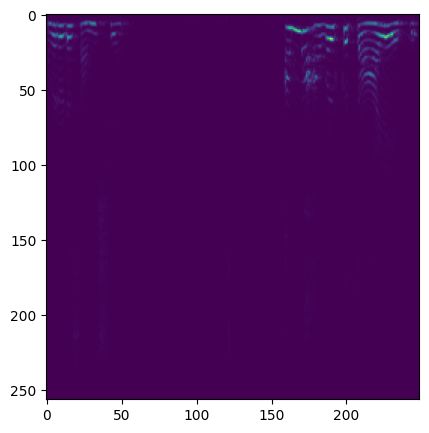

In [33]:
plt.figure(figsize = (20,5))
plt.imshow(tf.transpose(pred)[0])
plt.show()

In [20]:
pred = np.reshape(pred , (-1,249,257,1))

In [21]:
mal_prd = new_up_model.predict(pred)

1/1 [==============================] - 0s 102ms/step


In [25]:
np.argmax(mal_prd)

2

In [35]:
pred.shape

(1, 249, 257, 1)

In [36]:
pred = model.predict(pred)

1/1 [==============================] - 0s 85ms/step


In [37]:
pred

array([[1.4614304e-07, 2.8048354e-12, 1.6154465e-13, 9.9999988e-01]],
      dtype=float32)

In [38]:
np.argmax(pred)

3